# 实验三：参数估计 & 非参数估计

## 实验要求
### 截止日期：11月3日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$


<img src="https://i.loli.net/2021/03/31/7WT8naYPQc9N56x.png" alt="image.png" style="zoom: 40%;" /> 
<img src="https://i.loli.net/2021/03/31/qsetFODzM7IhYaN.png" alt="image.png" style="zoom:40%;" />

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。


### 中级要求
在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

### 高级要求
在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计
结果

# 一、基本要求
## 1. 生成数据集合

In [1]:
import numpy as np

# 设置随机数种子，以便结果可重复
np.random.seed(0)

# 定义参数
N = 1000
mu = np.array([[1, 4], [4, 1], [8, 4]])
covariance_matrix = 2 * np.identity(2)

# 生成X_1数据集合
prior_probabilities_1 = [1/3, 1/3, 1/3]
X_1 = np.zeros((N, 2))
for i in range(N):
    component = np.random.choice([0, 1, 2], p=prior_probabilities_1)
    X_1[i, :] = np.random.multivariate_normal(mu[component], covariance_matrix)

# 生成X_2数据集合
prior_probabilities_2 = [0.6, 0.3, 0.1]
X_2 = np.zeros((N, 2))
for i in range(N):
    component = np.random.choice([0, 1, 2], p=prior_probabilities_2)
    X_2[i, :] = np.random.multivariate_normal(mu[component], covariance_matrix)

# 打印X_1和X_2的前几个样本
print("X_1:")
print(X_1[:5])
print("\nX_2:")
print(X_2[:5])

X_1:
[[ 5.0487691   3.19615165]
 [ 6.64112584 -0.38207963]
 [ 5.790562    0.28458254]
 [ 5.07626987  1.17207446]
 [ 1.68492082  4.81902832]]

X_2:
[[3.60950831 1.61777133]
 [6.94637806 5.43155254]
 [3.12308572 0.57930742]
 [5.52884398 3.22361086]
 [2.2980854  3.57737724]]


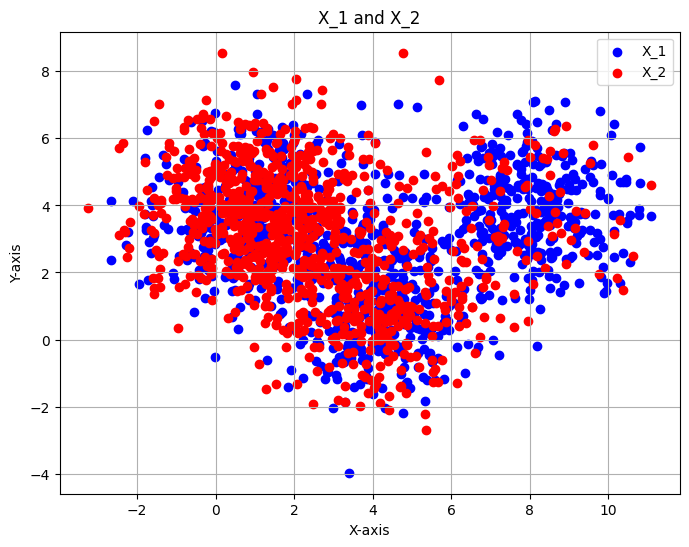

In [3]:
import matplotlib.pyplot as plt

# 可视化数据集合
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], c='blue', label='X_1')
plt.scatter(X_2[:, 0], X_2[:, 1], c='red', label='X_2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('X_1 and X_2')
plt.legend()
plt.grid(True)
plt.show()


## 2. 

## 参数估计—Eager Learning
当我们已知**样本的概率密度分布**，需要对**解析表达式的参数**进行求解时，就可以采用参数估计方法。

先验概率：指根据以往经验和分析，在实验或采样前就可以得到的概率。
后验概率：指某件事已经发生，想要计算这件事发生的原因是由某个因素引起的概率。

<img src="https://s2.loli.net/2022/10/20/RmU1sV8CBtjrDli.png" alt="image.png" style="zoom:50%"/>

### 最大似然估计 (MLE)

* 给定随机样本 $\mathbf{X}=\left\{ \mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N \right\} =\left\{ \mathbf{x}_k \right\} _{k=1}^{N}$来自概率密度 $p\left( \mathbf{x}\mid \theta \right)$ 
* 假设样本是独立同分布的,则它们的联合概率分布为 $p\left( \mathbf{X}\mid \theta \right) =p\left( \mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_N\mid \theta \right) =\prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right)$
* 估计使似然函数取最大值的参数 $\hat{\theta}:\hat{\theta}=\underset{\theta}{\text{arg}\max}\prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right)$ 
* 令似然函数对$\theta$的偏导数为零,求解 $\hat{\theta}:\frac{\partial}{\partial \theta}\log \prod_{k=1}^N{p}\left( \mathbf{x}_k\mid \theta \right) =0$
* 定义对数似然函数：  $L(\theta)=\log \prod_{k=1}^{N} p\left(\mathbf{x}_{k} \mid \theta\right) $
* 令似然函数对  $\theta$  的偏导数为零: 
$$
\begin{array}{l}
0&=\frac{\partial}{\partial \theta} L(\theta) \\
&=\frac{\partial}{\partial \theta} \log \prod_{k=1}^{N} p\left(\mathbf{x}_{k} \mid \theta\right) \\
&=\sum_{k=1}^{N} \frac{\partial}{\partial \theta} \log p\left(\mathbf{x}_{k} \mid \theta\right) \\
&=\sum_{k=1}^{N} \frac{1}{p\left(\mathbf{x}_{k} \mid \theta\right)} \frac{\partial}{\partial \theta} p\left(\mathbf{x}_{k} \mid \theta\right)
\end{array}
$$
* 求得  $\hat{\theta}$ , 对于样本点进行预测  $y=p(x \mid \hat{\theta})$ 

![Alt text](1697698114225.png)



### 最大后验概率估计 (MAP)
<img src="https://s2.loli.net/2022/10/20/LqxEFgKtNwl9ZG5.png" alt="image.png" style="zoom:50%"/>

### 贝叶斯估计 (Bayes)
已知: 数据集 $ \mathbf{X}=\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \ldots, \mathbf{x}_{N}\right\} $ 和参数 $ \theta $ 的先验概率 $ p(\theta)$ 
求解: $ p(\mathbf{x} \mid \mathbf{X})$ 
$$
\begin{aligned}
p(\mathbf{x} \mid \mathbf{X}) &=\int p(\mathbf{x} \mid \theta) p(\theta \mid \mathbf{X}) d \theta \\
p(\theta \mid \mathbf{X}) &=\frac{p(\mathbf{X} \mid \theta) p(\theta)}{p(\mathbf{X})}=\frac{p(\mathbf{X} \mid \theta) p(\theta)}{\int p(\mathbf{X} \mid \theta) p(\theta) d \theta} \\
p(\mathbf{x} \mid \theta, \mathbf{X}) &=\prod_{k}^{N} p\left(\mathbf{x}_{k} \mid \theta\right)
\end{aligned}
$$
由于后验分布是一个条件分布, 通常我们取后验分布的期望 $ {\hat\theta_{\text {Bayes }}}=E[\theta \mid \mathbf{X}] $ 作为参数的估计值。

## 非参数估计 — Lazy Learning
- 在⾮参数估计中，假定相似的输⼊具有相似的输出，不对基础密度假定任何形式的先验参数
- ⾮参数模型的复杂性依赖于训练集的⼤⼩，依赖于数据中问题的固有复杂性
- 当给定训练集时，并不计算模型，⽽将模型的计算推迟到给定⼀个检验实例时才进⾏，这会导致存储和计算量的增加。(⽐如：开卷考试)
- 核⼼思路：⼀个向量 落⼊区间 $R$ 中的概率为 $ p=\int_{R} p(x) d x $
- 主要⽅法：直⽅图估计、核估计、k最近邻估计
<img src="https://s2.loli.net/2022/10/20/5vkSjX9TRCdsEKp.png" alt="image.png" style="zoom:100%"/>
- 当样本数 $ \mathrm{n} $ 足够大时, 可以近似地认为 $ P \approx \frac{k}{n} $ , 其中 $ \mathrm{k} $ 是出现该特征的频数。
- 假设密度函数 $ p(x) $ 是连续的, 那么在区域 $ R $ 足够小时, 我们可以近似地认为 $ p(x) $ 是一个常值函数, 因此 $ P \approx p(x) V $, 其中  $V $ 是区域 $ R $ 的体积。
$$ \frac{k}{n} \approx P \approx p(x) V \Rightarrow p(x) \cong \frac{k}{n V}$$
<img src="https://s2.loli.net/2022/10/20/eiRhoIztdyHNXuk.png" style="zoom:50%"/>

### 核函数密度估计
<img src="https://s2.loli.net/2022/10/20/AHkVMFi3v8LpYqb.png"  style="zoom:50%"/>
<img src="https://s2.loli.net/2022/10/20/9sBWiDISdHjNaC2.png"  style="zoom:50%"/>
<img src="https://s2.loli.net/2022/10/20/9hAui8l6KYycsLH.png"  style="zoom:50%"/>


### k最近邻密度估计
<img src="https://s2.loli.net/2022/10/20/ViDtvjmzINwThHF.png" style="zoom:50%"/>

#
![Alt text](8eadfe804fd1384707717ec6fa2a178-3.png)

